# Quality Control of the Argo data

Load libraries

In [20]:
import numpy as np
import netCDF4
import xarray as xr

import cartopy.crs as ccrs
import cartopy

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib import pyplot as plt
%matplotlib inline

Create some usefull colormaps and colorbar makers:

In [21]:
qcmap = mpl.colors.ListedColormap(['#000000', 
                                   '#31FC03', 
                                   '#ADFC03', 
                                   '#FCBA03', 
                                   '#FC1C03',
                                   '#324CA8', 
                                   '#000000', 
                                   '#000000', 
                                   '#B22CC9', 
                                   '#000000'])
def colorbar_qc(cmap, **kwargs):
    """Adjust colorbar ticks with discrete colors for QC flags"""
    ncolors = 10
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable, **kwargs)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    return colorbar

open the daily data set from the 11th november 2019

In [22]:
dayADS = xr.open_dataset('./Data/atlantic_ocean/2019/11/20191111_prof.nc')

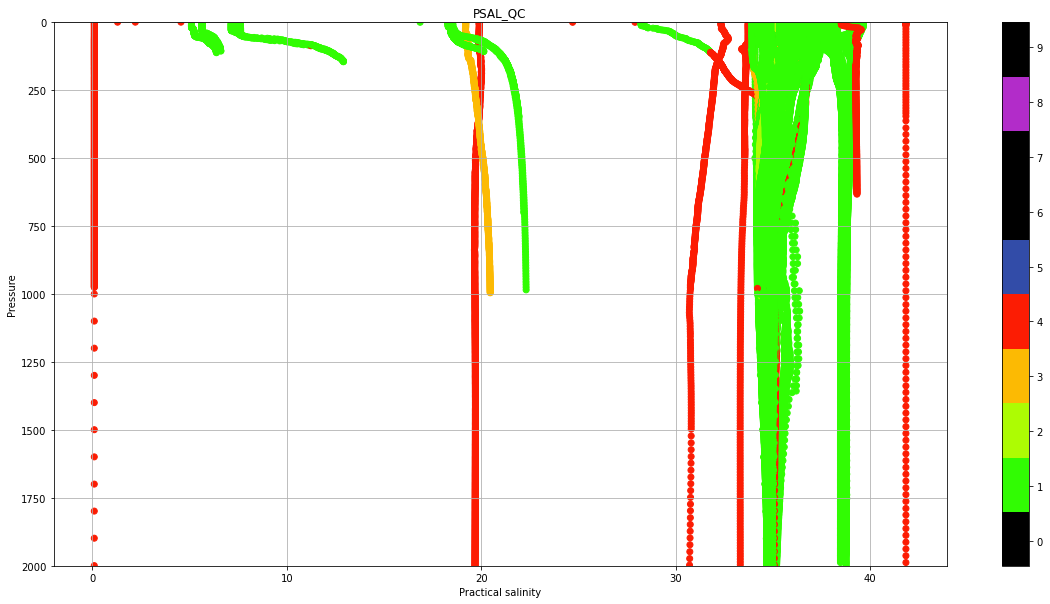

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
sc = ax.scatter(dayADS.PSAL, dayADS.PRES, c=dayADS.PSAL_QC, vmin=0, vmax=9, cmap=qcmap)
colorbar_qc(qcmap, ax=ax)
ax.grid()
ax.set_ylim(0,2000)
ax.invert_yaxis()
ax.set_xlabel(f"{dayADS.PSAL.long_name}")
ax.set_ylabel('Pressure')
ax.set_title('PSAL_QC');

l=dayADS.PSAL_QC[0,0]
print(dayADS.PSAL.where(dayADS.PSAL_QC.values.astype(str) == '1'))
l.values

## Quality Control flags